In [718]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math

In [719]:
def data_generator(n_points):
    mean = [0, 0]
    Sigma = [[1, 0],
            [0, 1]]

    # Generate 100 cases
    X = np.random.default_rng().multivariate_normal(mean, Sigma, n_points).T / 10

    # Subtract the mean from each variable
    for n in range(X.shape[0]):
        X[n] = X[n] - X[n].mean()

    # Make each variable in X orthogonal to one another
    L_inv = np.linalg.cholesky(np.cov(X, bias = True))
    L_inv = np.linalg.inv(L_inv)
    X = np.dot(L_inv, X)

    # Rescale X to exactly match Sigma
    L = np.linalg.cholesky(Sigma)
    X = np.dot(L, X)

    # Add the mean back into each variable
    for n in range(X.shape[0]):
        X[n] = X[n] + mean[n]
    return X

In [720]:
X = data_generator(1000)

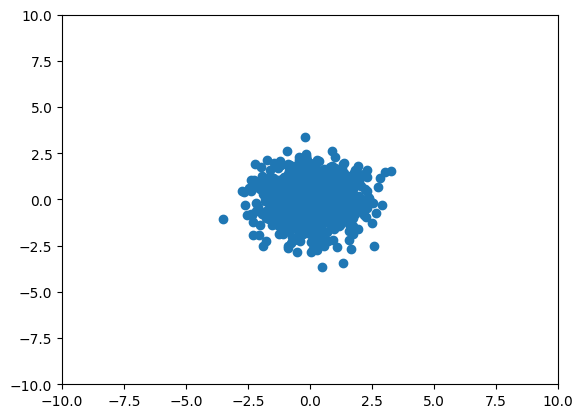

In [721]:
plt.scatter(X[0], X[1])
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.show()

In [722]:
cov_mat = np.round(np.cov(X, bias = True))
cov_mat

array([[ 1., -0.],
       [-0.,  1.]])

In [723]:
S = np.array([[3, 0],
              [0, 2]])
X1 = S @ X
np.round(np.cov(X1, bias = True))

array([[ 9., -0.],
       [-0.,  4.]])

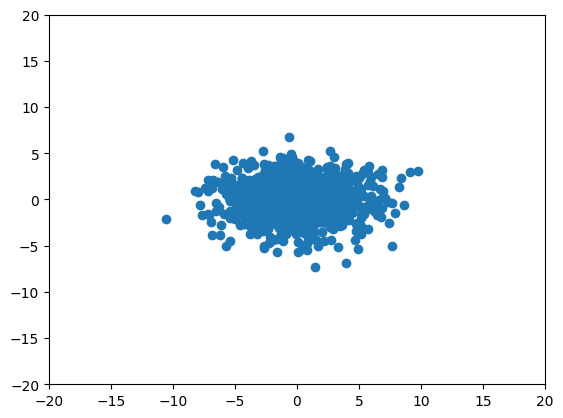

In [724]:
plt.scatter(X1[0], X1[1])
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.show()

In [725]:
R = np.array([[1, 1],
              [-1, 1]])
X2 = R @ X1
X2_cov = np.round(np.cov(X2, bias = True))
X2_cov

array([[13., -5.],
       [-5., 13.]])

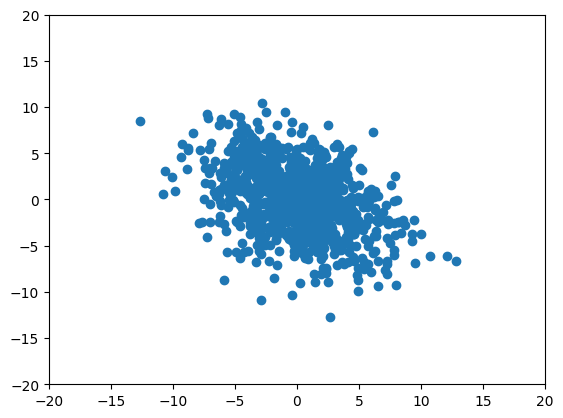

In [726]:
plt.scatter(X2[0], X2[1])
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.show()

In [727]:
T = R @ S
print(T)
X_origin = np.dot(np.linalg.inv(T), X2)
# np.round(np.cov(X_origin, bias=True))

[[ 3  2]
 [-3  2]]


In [728]:
eigenvalues, eigenvector = np.linalg.eig(X2_cov)
eigenvalues, eigenvector

(array([18.,  8.]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

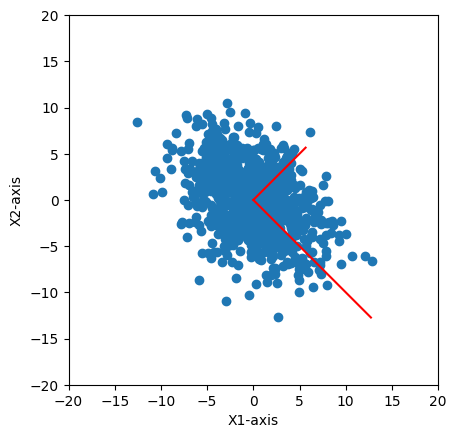

In [729]:
# plt.scatter(X2[0], X2[1])
# plt.plot([0, eigenvector[0][0] * eigenvalues[0]], [0, eigenvector[0][1] * eigenvalues[0]], 'r-')
# plt.plot([0, eigenvector[1][0] * eigenvalues[1]], [0, eigenvector[1][1] * eigenvalues[1]], 'r-')
# plt.xlim((-20, 20))
# plt.ylim((-20, 20))
# plt.show()

fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(X2[0], X2[1])
ax.plot([0, eigenvector[0,0] * eigenvalues[0]], [0, eigenvector[1, 0] * eigenvalues[0]], 'r-')
ax.plot([0, eigenvector[0, 1] * eigenvalues[1]], [0, eigenvector[1,1] * eigenvalues[1]], 'r-')
plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.show()